In [271]:
from helpers import get_samples
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import helpers
from importlib import reload
from collections import Counter
reload(helpers);

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\antom\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [192]:
df = get_samples(num_samples=5000, random=True)

In [193]:
df

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase
6,2020-04-15-000176,[ Queen ] can. He can cover.,None,[],2020-04-15 17:30:45,1,"[[None, 0.8956], [Eric DeCosta, 0.0665], [Kenn...",[https://www.pennlive.com/baltimore-ravens/202...,E
8,2020-04-02-000239,[ The scheme ] treats addiction as an illness ...,Barry Coppinger,[Q4864119],2020-04-02 14:18:20,1,"[[Barry Coppinger, 0.9017], [None, 0.0983]]",[http://www.theweek.co.uk/106479/why-police-ar...,E
9,2020-03-19-000276,[ These ] actions will allow households who ha...,Ben Carson,[Q816459],2020-03-19 19:14:00,1,"[[Ben Carson, 0.9227], [None, 0.0773]]",[https://mortgageorb.com/hud-fha-suspend-forec...,E
15,2020-03-12-000358,1. FM is entitled to go straight to press conf...,Paul Masterton,[Q30164281],2020-03-12 19:15:29,1,"[[Paul Masterton, 0.8082], [None, 0.144], [Ada...",[http://www.thenational.scot/news/18302427.cor...,E
30,2020-02-05-001246,A full restoration can run from about 120 all ...,Bill Kilpatrick,[Q4909730],2020-02-05 00:00:00,1,"[[Bill Kilpatrick, 0.8531], [None, 0.1469]]",[http://whec.com/news/small-business-spotlight...,E
...,...,...,...,...,...,...,...,...,...
49967,2020-01-18-032989,Pathri only has one of several Sai temples in ...,None,[],2020-01-18 12:25:03,8,"[[None, 0.7958], [Ashok Chavan, 0.2042]]",[https://www.business-standard.com/article/pti...,E
49968,2020-03-11-048075,pending developments related to the current he...,Cristiano Ronaldo,[Q11571],2020-03-11 17:37:54,21,"[[Cristiano Ronaldo, 0.8911], [None, 0.0894], ...",[http://www.breitbart.com/news/juventus-player...,E
49971,2020-01-15-065338,People from every income and educational level...,Chris Hughes,"[Q370321, Q5106937, Q5106939, Q5106940, Q51125...",2020-01-15 14:54:39,1,"[[Chris Hughes, 0.8982], [None, 0.0594], [Eliz...",[https://www.vox.com/the-highlight/2020/1/15/2...,E
49974,2020-02-28-052357,"People just thought I was their best mate,",None,[],2020-02-28 10:00:12,4,"[[None, 0.5818], [Martin Freeman, 0.288], [Joh...",[http://www.nytimes.com/2020/02/28/arts/televi...,E


In [194]:
#### Average length of the text before any preprocess : 

In [195]:
df = df.drop(["qids", "probas", "phase", "quoteID", "urls"], axis=1)
#sns.histplot(data=)

In [196]:
df["quote_len"] = df.quotation.apply(helpers.get_tokens).apply(len)

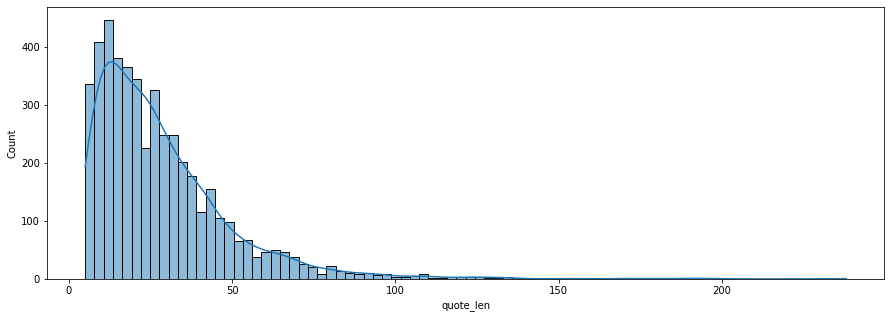

In [197]:
f, a = plt.subplots(figsize=(15, 5))
sns.histplot(data=df, x="quote_len", kde=True);

In [198]:
helpers.CIs(data=df, columns=["quote_len"], funcs=[np.mean, np.std, lambda x : np.percentile(x, 0.5)]).transpose()

,mean_low,mean_computed,mean_high,std_low,std_computed,std_high,<lambda>_low,<lambda>_computed,<lambda>_high
quote_len,27.670239,28.278294,28.731308,20.232017,21.20164,22.173613,5.0,5.0,5.0


In [199]:
from time import time
start = time()

df["prep_quote"] = df.quotation.apply(helpers.preprocess_quote)
print(f"It took : {round(time() - start, 2)} seconds")

It took : 8.63 seconds


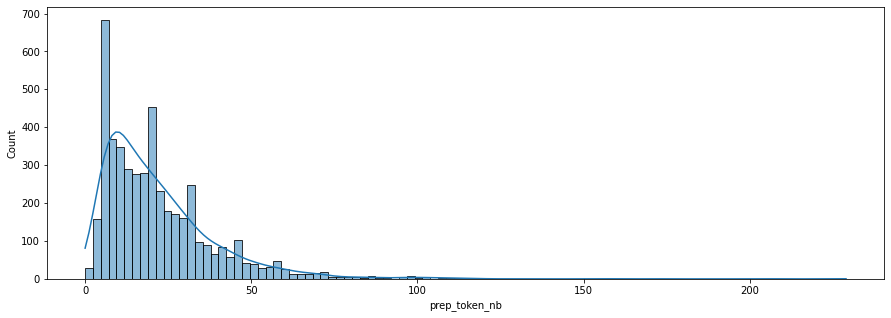

In [200]:
df["prep_token_nb"] = df.prep_quote.apply(len)
f, a = plt.subplots(figsize=(15, 5))
sns.histplot(data=df, x="prep_token_nb", kde=True);

In [201]:
helpers.CIs(data=df, columns=["prep_token_nb"], funcs=[np.mean, np.std, np.median]).transpose()

,mean_low,mean_computed,mean_high,std_low,std_computed,std_high,median_low,median_computed,median_high
prep_token_nb,21.603183,22.086149,22.582992,17.002965,18.030256,18.912219,17.0,17.0,17.0


In [202]:
print(df[df["prep_token_nb"] == df.prep_token_nb.max()]["quotation"].values[0])
print("\n"*3)
print(df[df["prep_token_nb"] == df.prep_token_nb.max()]["prep_quote"].values[0])

Recognizing that their states have one integrated regional economy, Rhode Island Governor Gina Raimondo, New York Governor Andrew M. Cuomo, New Jersey Governor Phil Murphy, Connecticut Governor Ned Lamont, Pennsylvania Governor Tom Wolf, and Delaware Governor John Carney today announced the creation of a multi-state council to restore the economy and get people back to work. This announcement builds on the states' ongoing regional approach to combatting the COVID-19 pandemic. The coordinating group -- comprised of one health expert, one economic development expert and the respective Chief of Staff from each state -- will work together to develop a fully integrated regional framework to gradually lift the states' stay at home orders while minimizing the risk of increased spread of the virus. The council will create this framework using every tool available to accomplish the goal of easing social isolation without triggering renewed spread - including testing, contact tracing, treatment 

### Word to Vec :

In [203]:
total = []
for prep in df.prep_quote.values:
    total = total + list(prep)

In [204]:
common = Counter(total).most_common(20)

In [205]:
### don't run : really long
### helpers.save_model()

In [207]:
### be careful : tension on RAM
model = helpers.get_model()

In [213]:
model.get_vector(common[0][0]).reshape((1, 300)).shape

(1, 300)

In [220]:
%timeit -n 1 helpers.aggregate(model, df.prep_quote.values[4]) 

151 µs ± 75 µs per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [66]:
df[df.prep_token_nb == 0]

,quotation,speaker,date,numOccurrences,quote_len,prep_quote,prep_token_nb
5923,"If you want 'em to be,",DJ Envy,2020-01-08 01:44:10,1,7,[],0
48417,Why can't we do that ourselves,None,2020-04-06 15:38:26,1,7,[],0
48468,You in your 20s?!?!?!?!?,Leslie Jones,2020-01-14 21:30:03,1,13,[],0


In [67]:
df = df[df.prep_token_nb != 0]

In [267]:
## Comme dirait Jean Pierre Coff : C DE LA MERDE

X = helpers.get_w2c_matrix(model, df, "prep_quote")

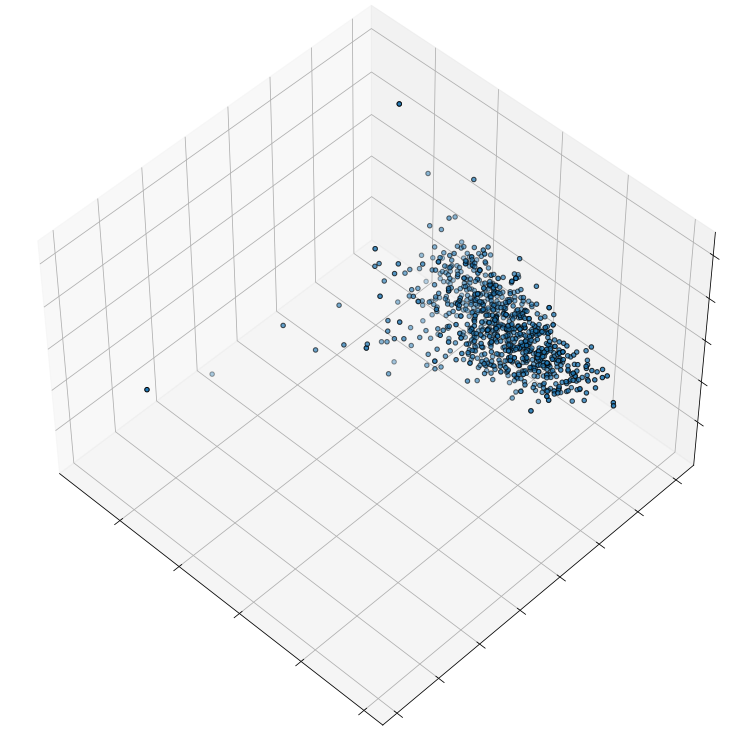

In [272]:
helpers.show_w2v_words(X)

### Discrimanation between years :

In [281]:
df['date'] = pd.to_datetime(df['date'])

In [306]:
split_dates = []
for month_id in range(1, 13):
    split_dates.append(pd.datetime(2020,month_id,1))
split_dates.append(pd.datetime(2021, 1, 1))

<ipython-input-306-1b9000f2df69>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_dates.append(pd.datetime(2020,month_id,1))
<ipython-input-306-1b9000f2df69>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  split_dates.append(pd.datetime(2021, 1, 1))


In [294]:
words_matrices = list(map(lambda x : helpers.get_w2c_matrix(model, x, "prep_quote"), dfs))

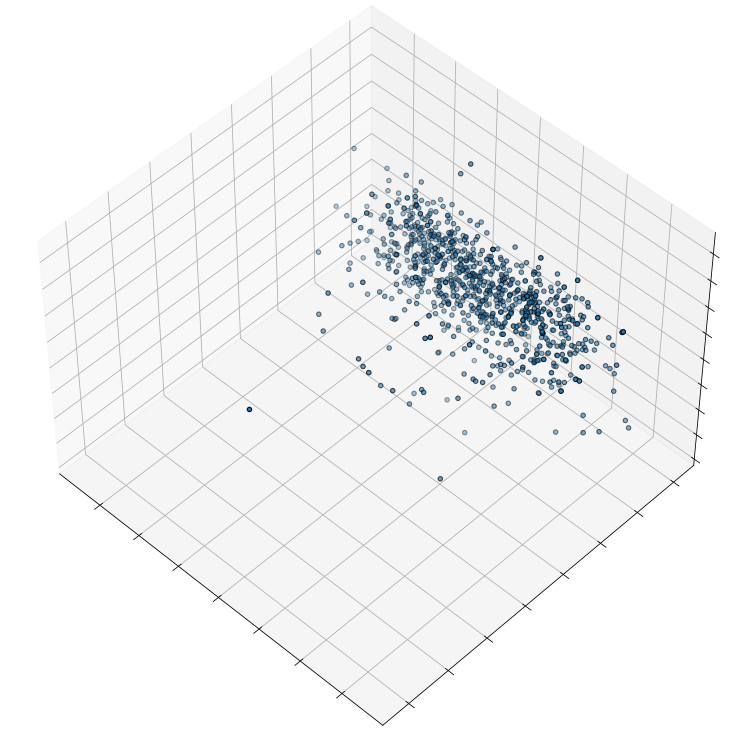

In [296]:
helpers.show_w2v_words(words_matrices[0])

In [313]:
df["month"] = pd.DatetimeIndex(df["date"]).month

In [317]:
vec_spaces = df.groupby("month").apply(lambda x : helpers.get_w2c_matrix(model, x, "prep_quote"))

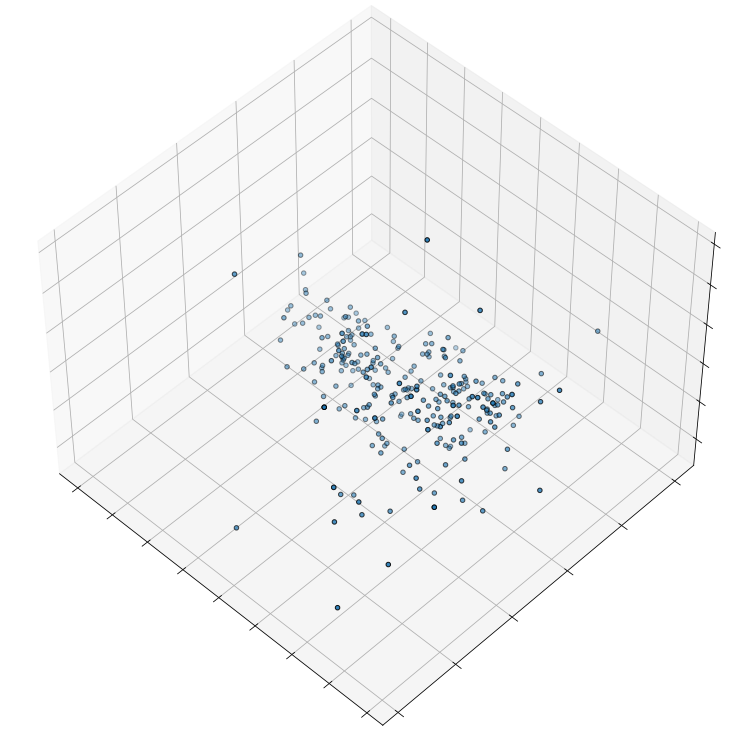

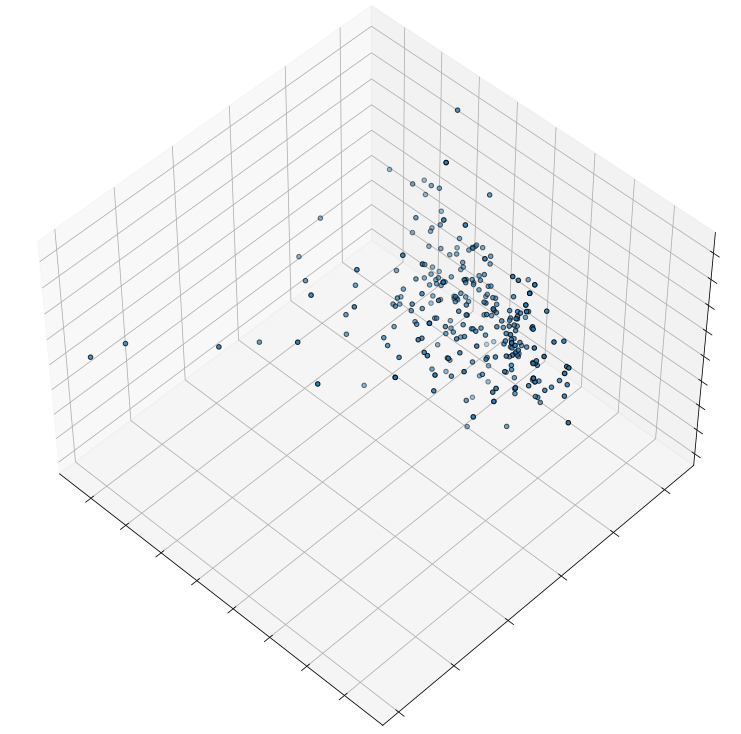

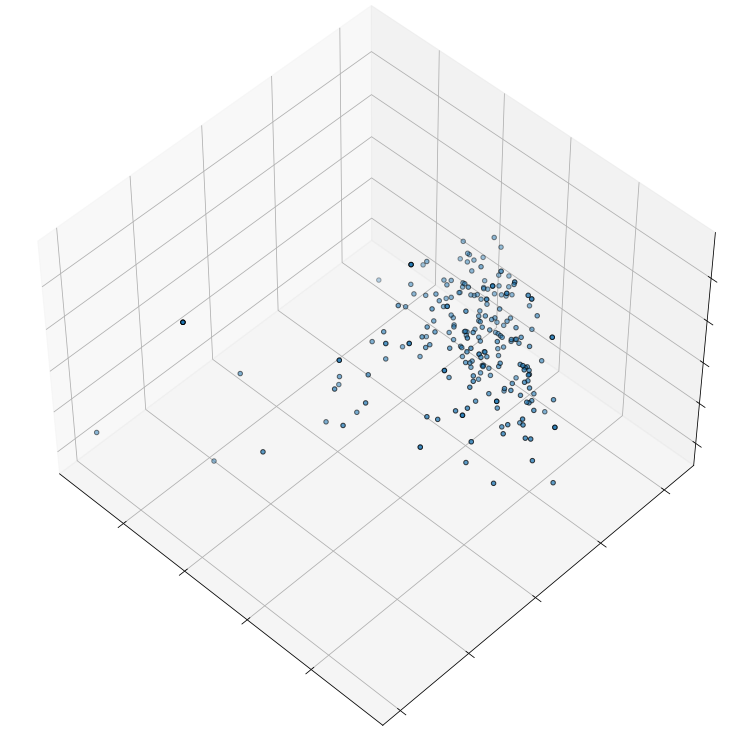

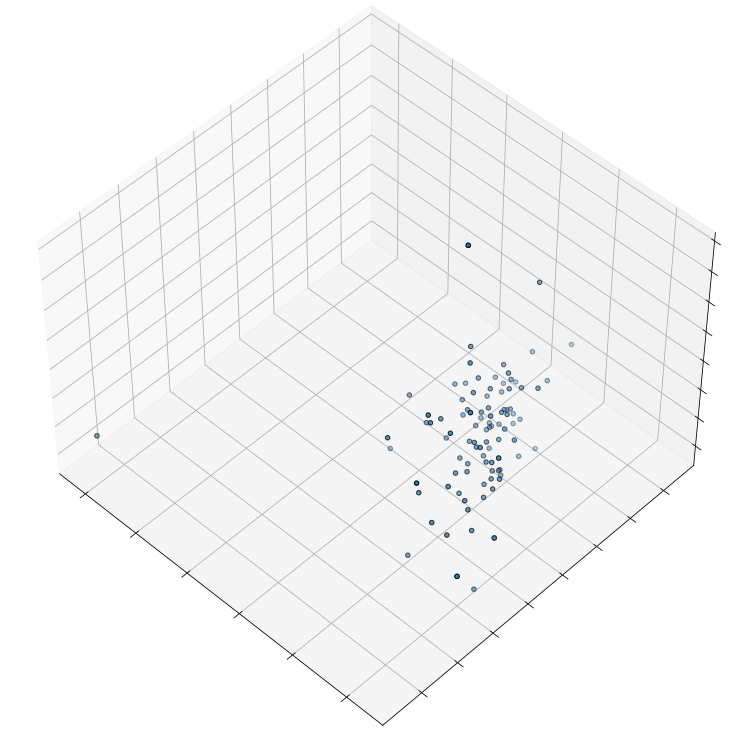

[None, None, None, None]

In [319]:
[helpers.show_w2v_words(vec_space) for vec_space in vec_spaces]

### Final Pipeline + Benchmarking :

In [324]:
def benchmark(start, part):
    print(f"It took for 10_000 samples : {round(time() - start, 2)} to {part}")

It took for 10_000 samples : 2.9 to load
It took for 10_000 samples : 13.19 to preprocess
It took for 10_000 samples : 1.76 to get matrices


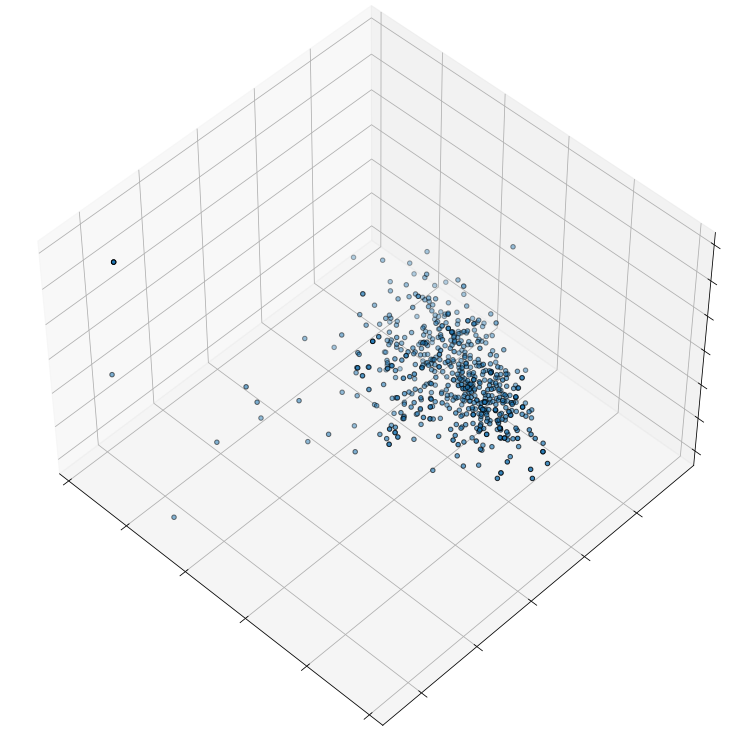

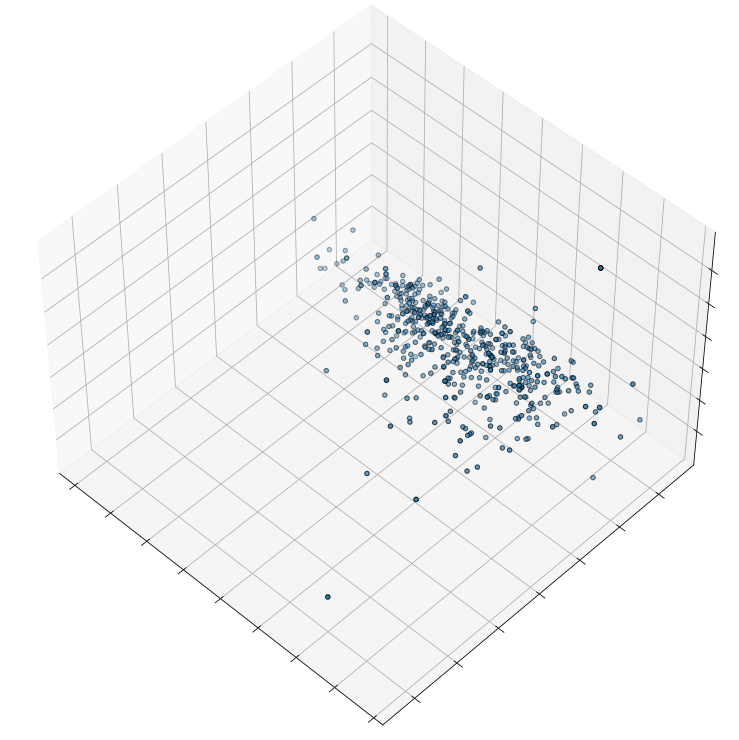

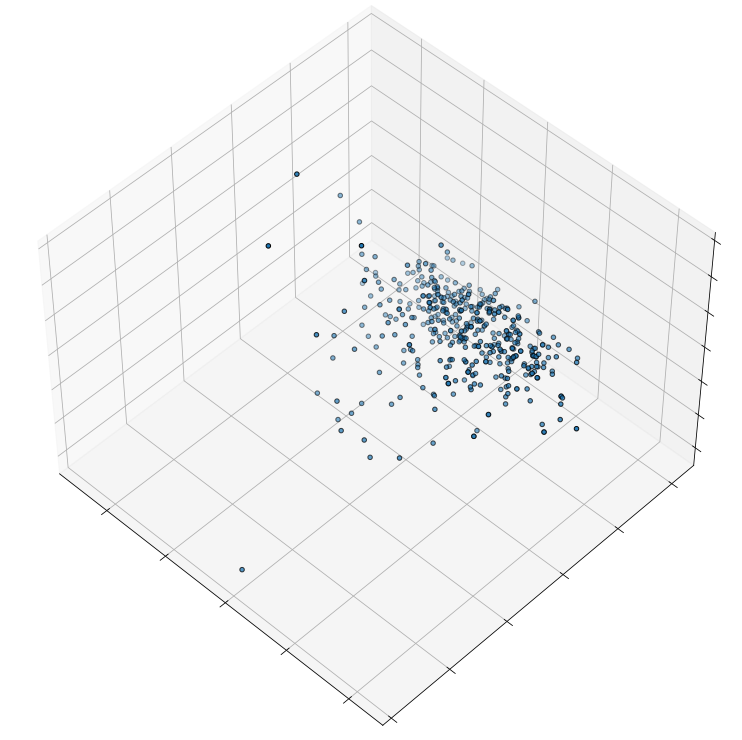

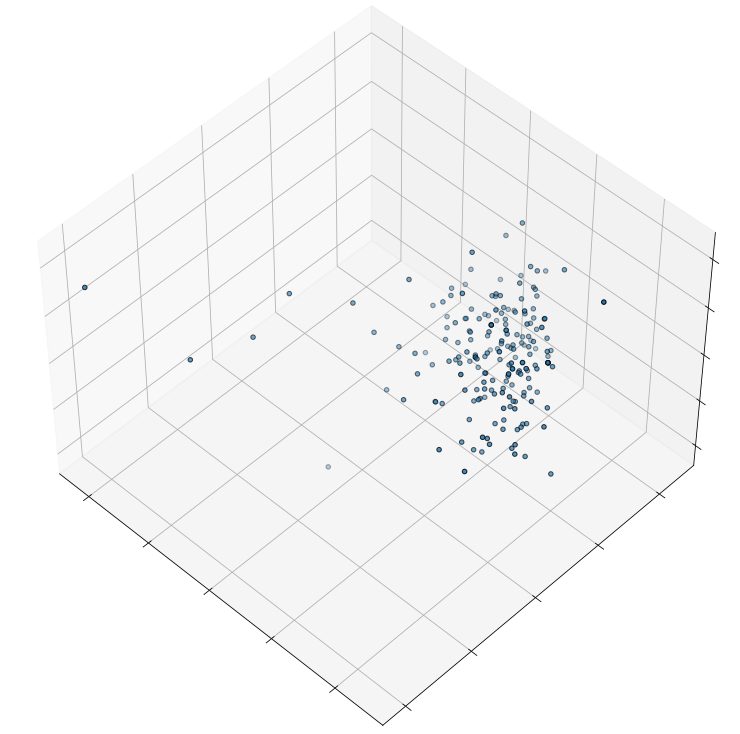

It took for 10_000 samples : 0.72 to plot
It took for 10_000 samples : 18.59 to do everything


In [325]:
start = time()

startr = time()
df = get_samples(num_samples=10_000, random=True)
benchmark(startr, "load")

df = df.drop(["qids", "probas", "phase", "quoteID", "urls"], axis=1) ## get rid of useless cols
df["date"] = pd.to_datetime(df["date"]) ## need date to split it after (need proper typing)

startr = time()
df["prep_quote"] = df.quotation.apply(helpers.preprocess_quote) ## preprocess quotes
benchmark(startr, "preprocess")

## discriminate with the month here :
df["month"] = pd.DatetimeIndex(df["date"]).month

startr = time()
## get all the datapoints (one per quote) in W2V vector space
vec_spaces = df.groupby("month").apply(lambda x : helpers.get_w2c_matrix(model, x, "prep_quote"))
benchmark(startr, "get matrices")

## plot them all : 
startr = time()
[helpers.show_w2v_words(vec_space) for vec_space in vec_spaces]
benchmark(startr, "plot")

benchmark(start, "do everything")